In [1]:
%matplotlib inline
from shapely import wkt
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pysal.lib import examples
import pysal as ps
import geopandas as gpd
from sklearn import cluster
from sklearn.preprocessing import scale
from scipy.special import factorial
#sns.set(style="whitegrid")

C:\Users\jianq\Anaconda3\lib\site-packages\pysal\explore\segregation\network\network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"
C:\Users\jianq\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
df_final=pd.read_csv("Final_merged_city_portland.csv") 
df_final=df_final.reset_index()
df_final=df_final.drop(columns=['index'])

df_final['geometry'] = df_final['geometry'].apply(wkt.loads)

In [3]:
df_final['edut_ratio'] = df_final['edut']/df_final['pop']
df_final['total_tran_ratio'] = df_final['total_tran']/df_final['pop']

In [4]:
df_final.columns

Index(['Unnamed: 0', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'EmploymentS', 'EstablishmentS', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'edut_ratio', 'total_tran_ratio'],
      dtype='object')

In [5]:
df_final.head(5)

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,edut_ratio,total_tran_ratio
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,(POLYGON ((-122.3868792758254 45.5190298016209...,2601,5717,3699,294,356,...,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994,0.647018,0.454959
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,(POLYGON ((-122.3868792758254 45.5190298016209...,2826,6037,4024,368,476,...,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908,0.666556,0.468113
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,(POLYGON ((-122.3868792758254 45.5190298016209...,2868,6153,4090,369,507,...,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533,0.664716,0.466114
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,(POLYGON ((-122.3868792758254 45.5190298016209...,2876,6022,3931,296,404,...,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517,0.652773,0.477582
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,(POLYGON ((-122.3868792758254 45.5190298016209...,3078,6181,4094,316,457,...,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392,0.662352,0.497978


In [6]:
c = ['total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
        'EmploymentS', 'EstablishmentS', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'edut_ratio', 'total_tran_ratio']

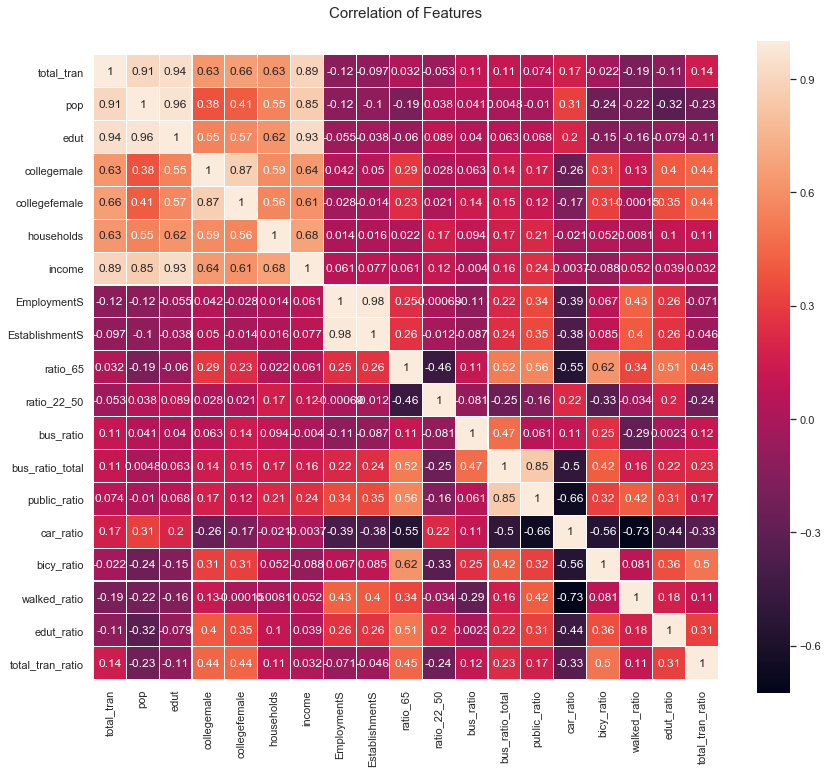

In [7]:
df_corr = df_final[c]
import seaborn as sns; sns.set()

plt.figure(figsize=(14,12))
plt.title('Correlation of Features',y=1.05,size=15)
sns.heatmap(df_corr.corr(),linewidths=0.1,vmax=1.0,
            square=True,linecolor='white',annot=True)
plt.show()


In [8]:
len(c)

19

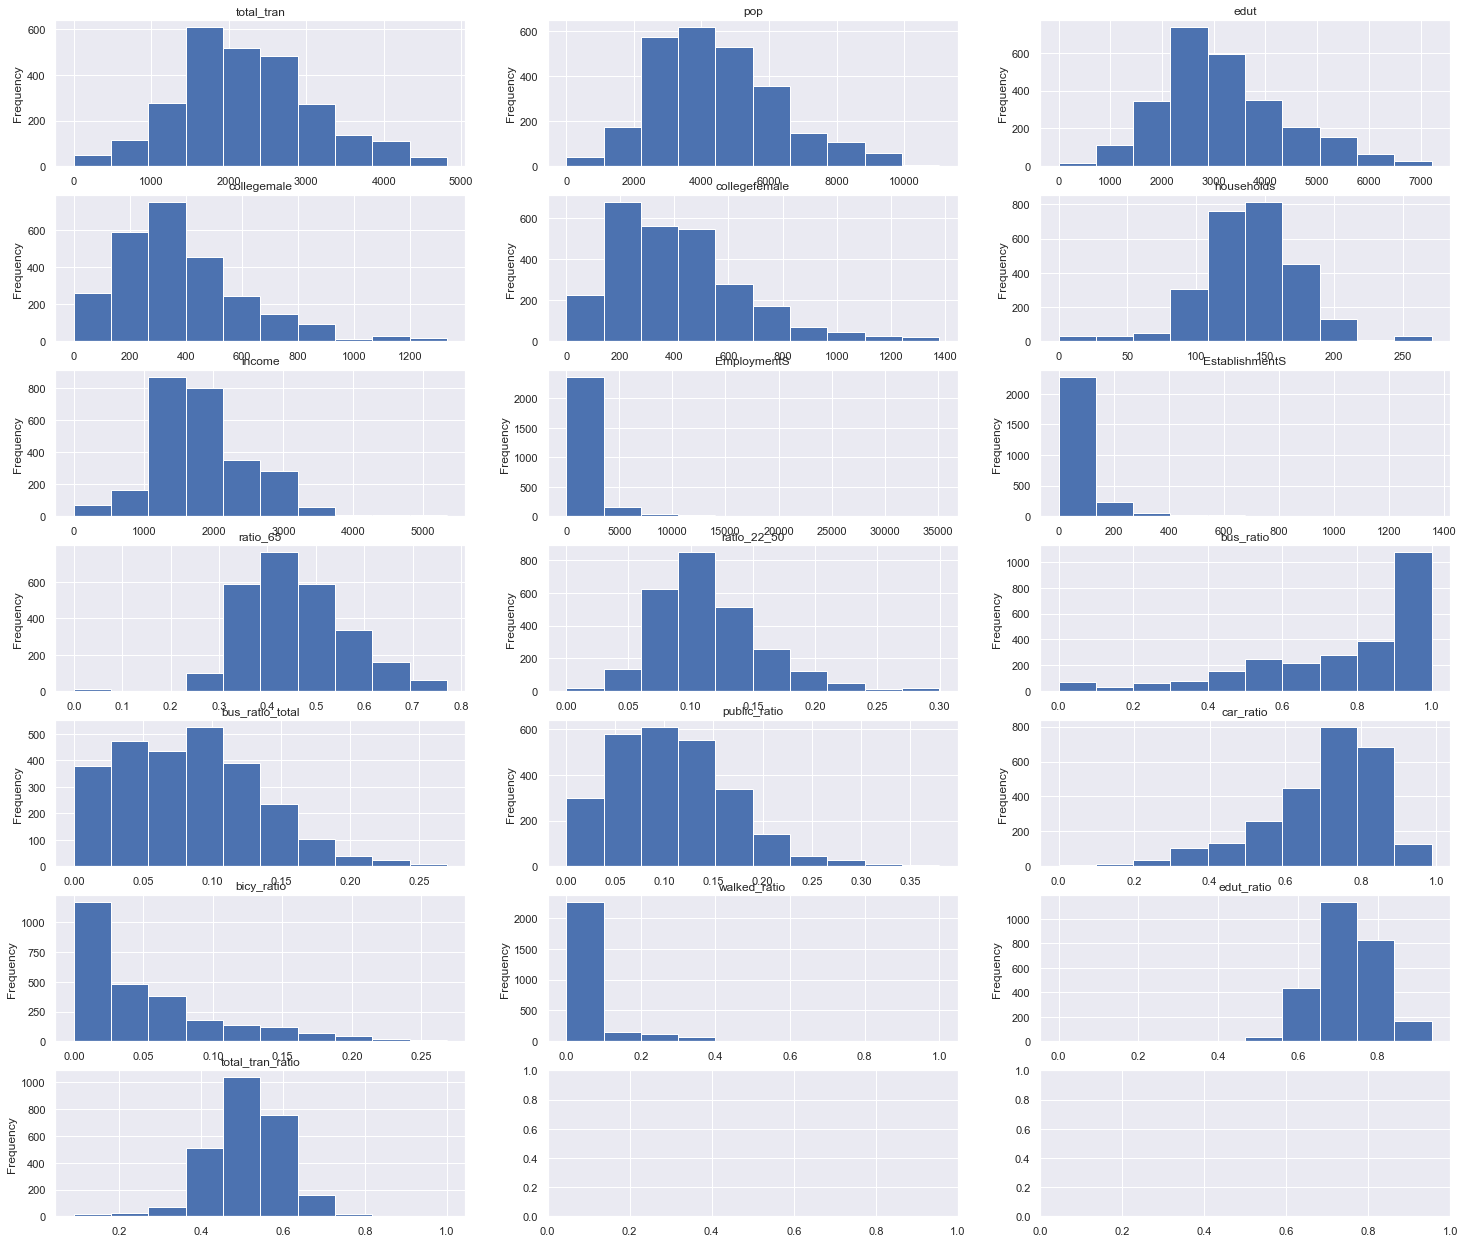

In [9]:
f1, ax = plt.subplots(7,3, figsize=(25,22))
n = 0
for i in range(7):
    for j in range(3):
        ax[i,j].set_title(c[n], fontsize=12) 
        df_corr[c[n]].plot(ax = ax[i,j], kind = 'hist', title = c[n])
        n += 1
        if n >= 19:
            break
    if n >= 19:
        break

In [10]:
df_final2=df_final.groupby(['geo_id'], as_index=False).agg(
    { 'EmploymentS':'mean', 'EstablishmentS':'mean','geometry':'first','total_tran':'mean',
     
       'pop':'mean', 'edut':'mean', 'collegemale':'mean', 'collegefemale':'mean', 'households':'mean',
     'income':'mean','ratio_65':'mean',
       'ratio_22_50':'mean', 'bus_ratio':'mean',
       'bus_ratio_total':'mean', 'public_ratio':'mean', 'car_ratio':'mean',
     'bicy_ratio':'mean',
       'walked_ratio':'mean', 'edut_ratio':'mean', 'total_tran_ratio':'mean'})

In [11]:
gdf2 =gpd.GeoDataFrame(df_final2, geometry='geometry', crs={'init': 'epsg:4326'})
gdf2.head()

,geo_id,EmploymentS,EstablishmentS,geometry,total_tran,pop,edut,collegemale,collegefemale,households,...,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,edut_ratio,total_tran_ratio
0,41051000100,4093.842436,233.650918,"MULTIPOLYGON (((-122.66851 45.48963, -122.6654...",3243.250,6095.875,4667.250,615.000,733.125,170.125,...,0.464817,0.121203,0.953060,0.084304,0.087963,0.677976,0.095493,0.041783,0.765562,0.531955
1,41051000200,853.065138,48.326562,"MULTIPOLYGON (((-122.65115 45.49032, -122.6493...",3135.125,6157.500,4660.500,653.750,825.875,173.250,...,0.488260,0.134470,0.957985,0.107039,0.111167,0.671435,0.091021,0.025325,0.756257,0.509495
2,41051000301,1552.518125,88.608023,"MULTIPOLYGON (((-122.64352 45.49031, -122.6395...",2580.875,5330.125,3346.750,423.375,387.625,130.500,...,0.449649,0.131125,0.964928,0.139973,0.144679,0.497451,0.050301,0.186356,0.628025,0.482935
3,41051000302,145.966677,8.613696,"MULTIPOLYGON (((-122.63766 45.47436, -122.6344...",3633.000,6929.875,4937.750,824.375,858.625,175.500,...,0.385256,0.137374,0.972658,0.055748,0.057137,0.758092,0.074766,0.036437,0.712255,0.524129
4,41051000401,543.987224,37.206859,"MULTIPOLYGON (((-122.62057 45.48277, -122.6205...",1994.375,3549.625,2708.625,410.500,492.500,141.500,...,0.518228,0.103065,0.991553,0.113903,0.115135,0.727155,0.049731,0.015462,0.762600,0.564169


In [12]:
gdf2.columns

Index(['geo_id', 'EmploymentS', 'EstablishmentS', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'ratio_65', 'ratio_22_50', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio', 'edut_ratio',
       'total_tran_ratio'],
      dtype='object')

In [13]:
c2 = ['EmploymentS', 'EstablishmentS', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'ratio_65', 'ratio_22_50', 'bus_ratio', 'bus_ratio_total',
       'public_ratio', 'car_ratio', 'bicy_ratio', 'walked_ratio', 'edut_ratio',
       'total_tran_ratio']

In [14]:
len(c2)

19

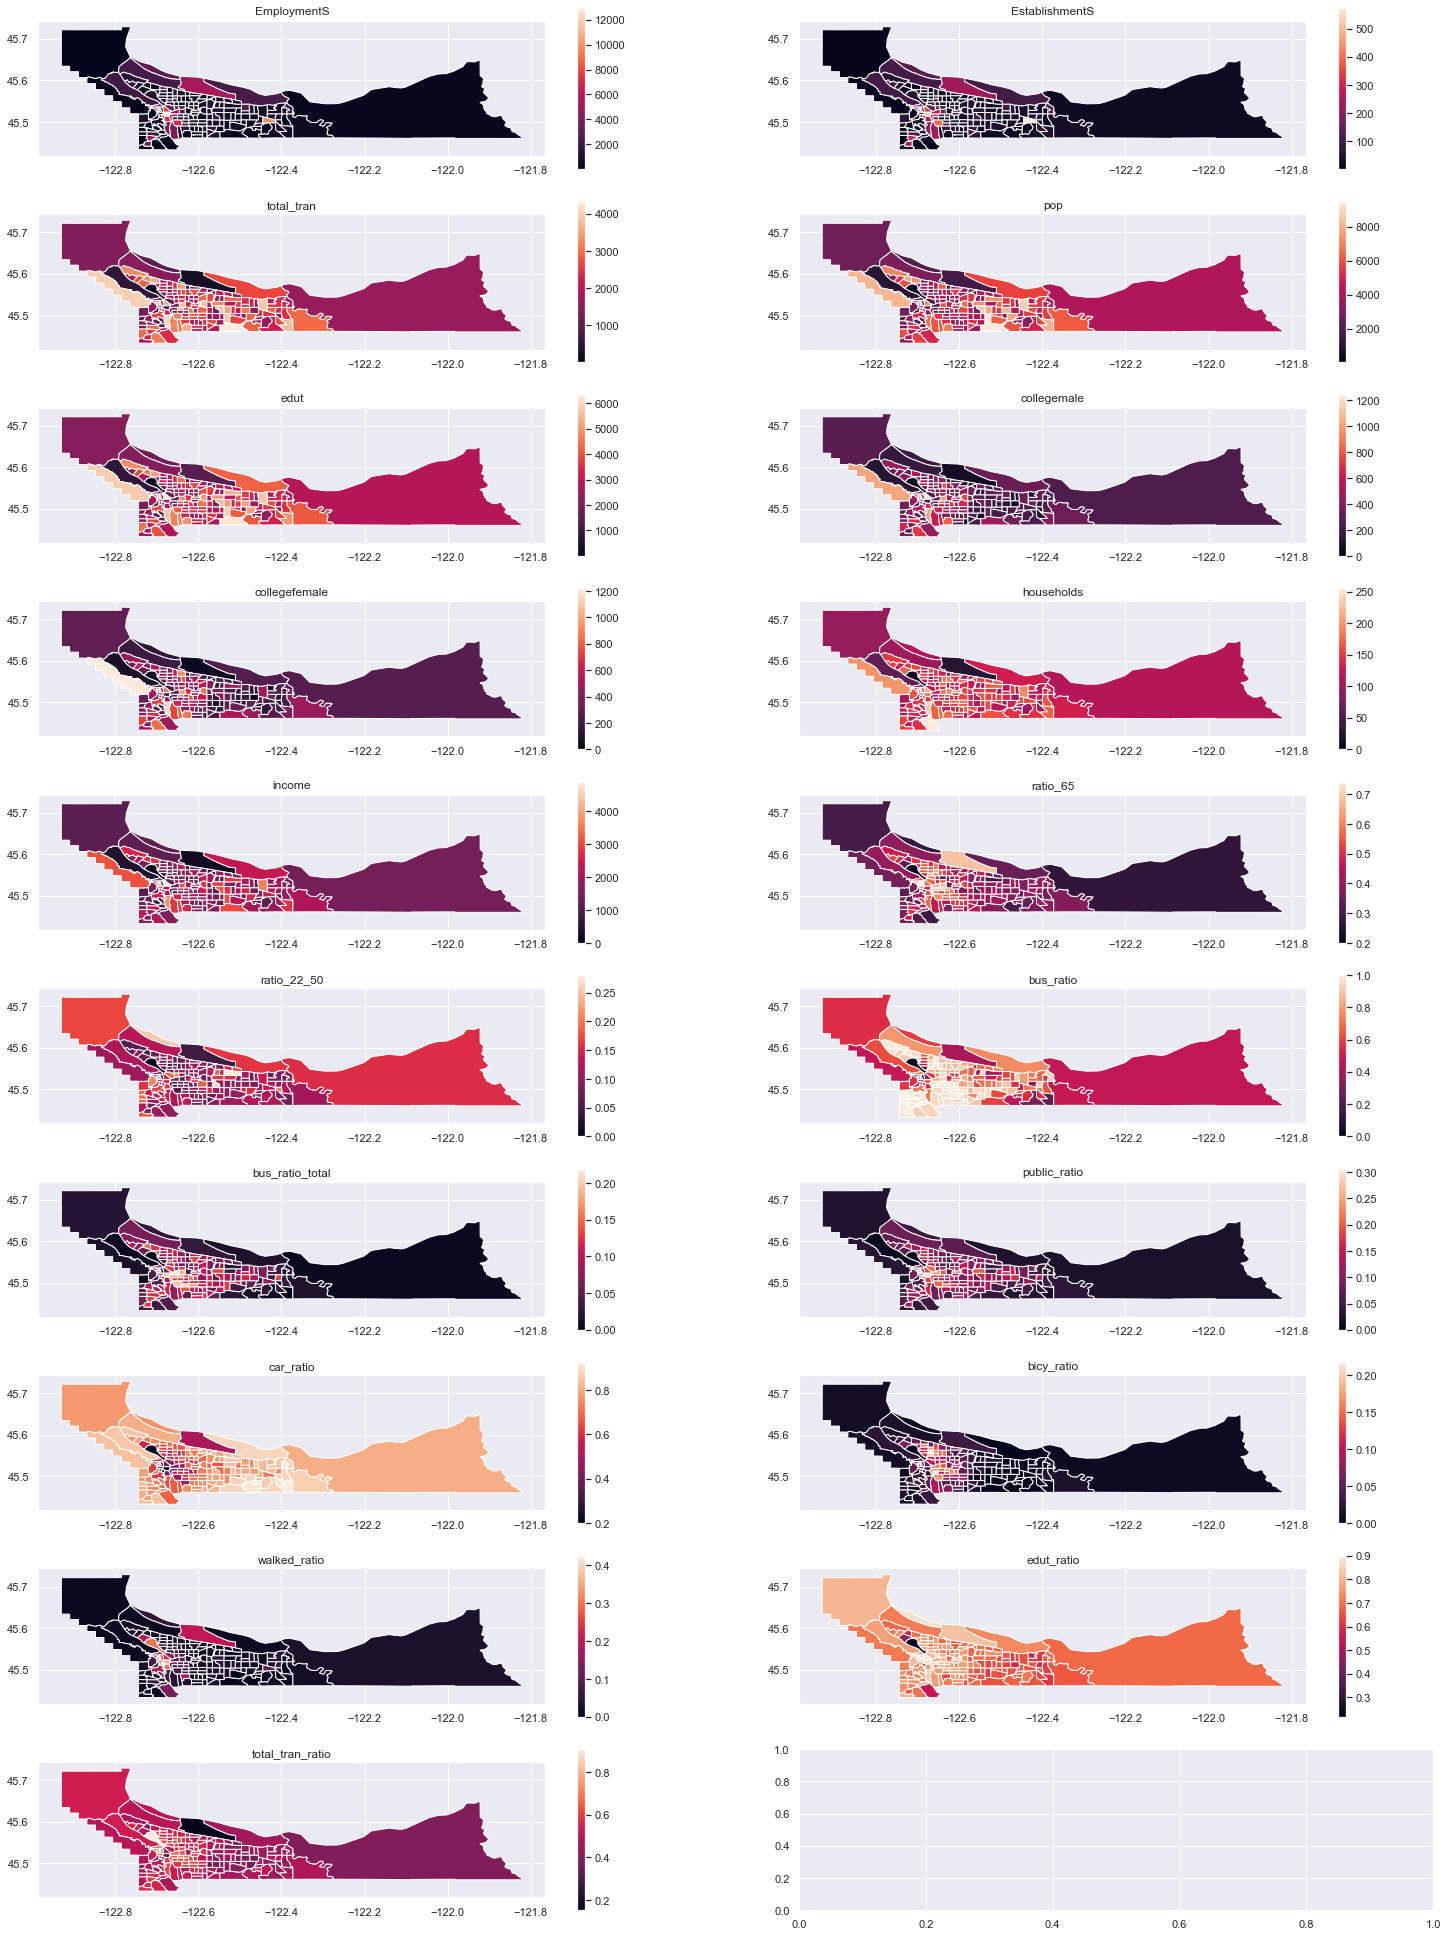

In [15]:
f, ax = plt.subplots(10,2, figsize=(25,35))
n = 0
for i in range(10):
    for j in range(2):
        ax[i,j].set_title(c2[n], fontsize=12) 
        gdf2.plot(ax = ax[i,j], column= c2[n], legend=True)
        n += 1
        if n >= 19:
            break
    if n >= 19:
        break

### Feature selection - Lasso Model

In [16]:
#在Lasso中，参数 alpha越大，选择的特征越少。
from sklearn import linear_model

In [17]:
df_final.columns

Index(['Unnamed: 0', 'geo_id', 'centroid', 'year', 'geometry', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'EmploymentS', 'EstablishmentS', 'ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'edut_ratio', 'total_tran_ratio'],
      dtype='object')

In [18]:
df_final.interpolate()

,Unnamed: 0,geo_id,centroid,year,geometry,total_tran,pop,edut,collegemale,collegefemale,...,ratio_65,ratio_22_50,bus_ratio,bus_ratio_total,public_ratio,car_ratio,bicy_ratio,walked_ratio,edut_ratio,total_tran_ratio
0,2432,41051010402,POINT (-122.3356996936241 45.48566422279789),2010,(POLYGON ((-122.3868792758254 45.5190298016209...,2601,5717,3699,294,356,...,0.391464,0.091307,0.490196,0.009612,0.019608,0.891580,0.005767,0.014994,0.647018,0.454959
1,2435,41051010402,POINT (-122.3356996936241 45.48566422279789),2011,(POLYGON ((-122.3868792758254 45.5190298016209...,2826,6037,4024,368,476,...,0.405831,0.108001,0.305970,0.014508,0.047417,0.866596,0.030432,0.009908,0.666556,0.468113
2,2438,41051010402,POINT (-122.3356996936241 45.48566422279789),2012,(POLYGON ((-122.3868792758254 45.5190298016209...,2868,6153,4090,369,507,...,0.393954,0.109052,0.266667,0.011158,0.041841,0.857043,0.033473,0.004533,0.664716,0.466114
3,2441,41051010402,POINT (-122.3356996936241 45.48566422279789),2013,(POLYGON ((-122.3868792758254 45.5190298016209...,2876,6022,3931,296,404,...,0.366490,0.108602,0.321739,0.012865,0.039986,0.858832,0.025730,0.012517,0.652773,0.477582
4,2444,41051010402,POINT (-122.335683996136 45.48565935229686),2014,(POLYGON ((-122.3868792758254 45.5190298016209...,3078,6181,4094,316,457,...,0.387316,0.108720,0.264368,0.007472,0.028265,0.875569,0.016244,0.023392,0.662352,0.497978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,1967,41051009000,POINT (-122.5306977041103 45.49261599741428),2013,(POLYGON ((-122.5377964271651 45.4874241470326...,3615,8815,5598,250,333,...,0.378900,0.112082,0.931354,0.138866,0.149101,0.751591,0.000000,0.037344,0.635054,0.410096
2604,1969,41051009000,POINT (-122.5306977041103 45.49261599741428),2014,(POLYGON ((-122.5377964271651 45.4874241470326...,4006,9787,6067,372,404,...,0.398079,0.100848,0.954183,0.119571,0.125312,0.763105,0.000000,0.028208,0.619904,0.409318
2605,1971,41051009000,POINT (-122.5306977041103 45.49261599741428),2015,(POLYGON ((-122.5377964271651 45.4874241470326...,4525,10489,6588,468,340,...,0.427019,0.094289,0.970642,0.116906,0.120442,0.784530,0.000000,0.013481,0.628087,0.431404
2606,1973,41051009000,POINT (-122.5306977041103 45.49261599741428),2016,(POLYGON ((-122.5377964271651 45.4874241470326...,4617,10809,6682,422,356,...,0.418818,0.097419,0.956153,0.146415,0.153130,0.750054,0.003465,0.019493,0.618189,0.427144


In [19]:
missingcolumns = df_final.columns[df_final.isna().sum() > 0].tolist()
missingcolumns

['edut_ratio', 'total_tran_ratio']

In [20]:
for c in missingcolumns:
    df_final[c] = df_final[c].interpolate()

In [21]:
df_final.isna().sum()

Unnamed: 0          0
geo_id              0
centroid            0
year                0
geometry            0
total_tran          0
pop                 0
edut                0
collegemale         0
collegefemale       0
households          0
income              0
zipcode             0
EmploymentS         0
EstablishmentS      0
ratio_65            0
ratio_22_50         0
bus_ratio           0
bus_ratio_total     0
public_ratio        0
car_ratio           0
bicy_ratio          0
walked_ratio        0
edut_ratio          0
total_tran_ratio    0
dtype: int64

In [32]:
y3 = df_final["EstablishmentS"]
features = ['year', 'total_tran',
       'pop', 'edut', 'collegemale', 'collegefemale', 'households', 'income',
       'zipcode', 'EmploymentS','ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'edut_ratio', 'total_tran_ratio']
X3 = df_final[features]

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X3 = scaler.fit_transform(X3)

C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 218123.11634742713, tolerance: 3934.8222547476503
  positive)
C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 202878.89614283317, tolerance: 3934.8222547476503
  positive)
C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188086.72416700015, tolerance: 3934.8222547476503
  positive)
C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6163.2786495729815, tolerance: 3934.8222547476503
  positive)
C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5319.371707943268, tolerance: 3934.8222547476503
  positive)
C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4586.178609965835, tolerance: 3934.8222547476503
  positive)
C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

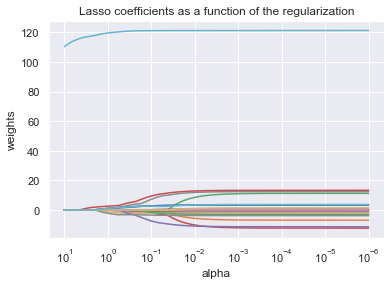

In [25]:
n_alphas = 200
alphas = np.logspace(-6, 1, n_alphas)

coefs = []
R_2=[]
for a in alphas:
    clf = linear_model.Lasso(fit_intercept=True,alpha=a)
    clf.fit(X3,y3)
    coefs.append(clf.coef_)
    R_2.append(1-((clf.predict(X3)-y3)**2).mean()/y3.var())

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse x-axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [33]:
from sklearn.linear_model import LassoCV
#X3 used here is not scaled
model_lasso = LassoCV(alphas = alphas).fit(X3, y3)
model_lasso.alpha_

C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\jianq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 687818.9969631537, tolerance: 3934.8222547476503
  positive)


1e-06

In [34]:
len(model_lasso.coef_)

20

In [35]:
model_lasso.coef_

array([ 1.50865122e+00, -7.71528355e-03,  6.18930907e-03, -9.98623862e-03,
       -5.33986733e-03, -1.15931761e-03, -6.51390115e-02,  1.69781010e-02,
       -3.19766845e-02,  4.28466079e-02,  3.28384703e+01,  8.26459556e+00,
       -1.21905656e+01,  2.65138465e+02, -1.83950077e+02,  4.73588330e+00,
        2.49024422e+00, -4.53202081e+01,  1.81973138e+01,  3.95952564e+01])

In [36]:
import pandas as pd
coef = pd.Series(model_lasso.coef_, index = features)

In [37]:
count = 0
for i in coef.values:
    if i > 0.1 or i < -0.1:
        count = count + 1
print(count)

11


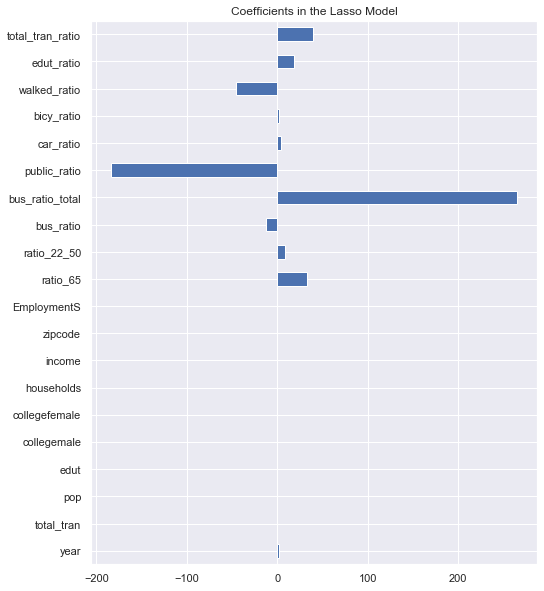

In [38]:
import matplotlib
imp_coef = pd.concat([coef.sort_values().head(3),
                     coef.sort_values().tail(3)])

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show() 

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
features_l = ['ratio_65', 'ratio_22_50',
       'bus_ratio', 'bus_ratio_total', 'public_ratio', 'car_ratio',
       'bicy_ratio', 'walked_ratio', 'edut_ratio', 'total_tran_ratio']
y = gdf2['EstablishmentS']
X = gdf2[features_l]

In [49]:
model = LinearRegression(fit_intercept=True).fit(X, y)
model.coef_

array([  28.19555552,  -88.15668782, -151.36383135, 1743.32099914,
       -832.12321403,   74.82510421,  -85.50582378,  695.48971903,
        347.66941548, -191.36072423])

In [50]:
model.score(X,y)

0.414452397854172

In [51]:
model2 = LinearRegression(fit_intercept=False).fit(X, y)
model.coef_

array([  28.19555552,  -88.15668782, -151.36383135, 1743.32099914,
       -832.12321403,   74.82510421,  -85.50582378,  695.48971903,
        347.66941548, -191.36072423])

In [67]:
lm = smf.ols(formula = 'EstablishmentS ~ ratio_65 + ratio_22_50 + bus_ratio + bus_ratio_total + public_ratio + car_ratio + bicy_ratio + walked_ratio + edut_ratio + total_tran_ratio', data = gdf2).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         EstablishmentS   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     11.32
Date:                Tue, 30 Jun 2020   Prob (F-statistic):           1.55e-14
Time:                        19:22:01   Log-Likelihood:                -961.43
No. Observations:                 171   AIC:                             1945.
Df Residuals:                     160   BIC:                             1979.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -110.6015    161.200  

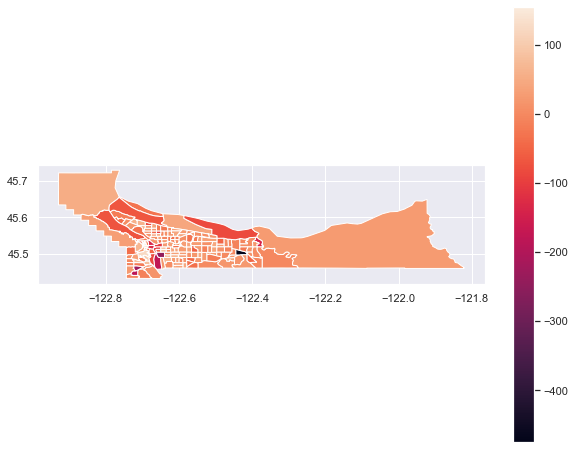

In [70]:
#plot the difference
difference = y2-y
gdf2["difference"] = difference
gdf2.plot(column = "difference", legend=True, figsize=(10,8))